In [1]:
from ipywidgets import interact, FloatSlider, Checkbox, fixed
from module01 import van_deemter_plot, van_deemter_particles_plot, plot_chromatograms

%load_ext autoreload
%autoreload 2

# Van Deemter in Practice: An Interactive Exploration of Chromatographic Efficiency, Flow Rate, and Particle Size

Christian P. Haas, September 2025

## Overview

This notebook turns the van Deemter equation into a hands-on playground. You’ll build intuition for how eddy diffusion (*A*), longitudinal diffusion (*B/u*), and mass transfer (*C·u*) shape plate height *H* as a function of flow rate *u*—and translate that into practical method-design choices for LC (and GC, where noted).

## Learning Objectives

By the end, you will be able to:

* Interpret the *A*, *B/u*, and *C·u* terms and explain how each dominates in different *u*-regimes.
* Identify the optimal flow rate *u*<sub>opt</sub> and corresponding *H*<sub>min</sub>, and relate *H* to plate number (*N = L/H*) and resolution (*R*<sub>s</sub>).
* Compare particle **size** effects on *A* and *C*, and reason about trade-offs among speed, resolution, and pressure limits.
* Make design decisions (e.g., choose *u*, *L*, and particle size) under realistic constraints such as pressure and extra-column broadening.
* (Optional) Use reduced plots (*h–ν*) to compare columns and operating conditions on a common scale.

## Audience & Prerequisites

* **Who:** Students and practitioners in analytical chemistry, chromatography, or method development.
* **Assumed knowledge:** Basic LC/GC terminology (*H, N, u, k′, α, R*<sub>s</sub>*).*
* **No coding required** to use the interactive widgets; minimal Python familiarity helps only if you modify the notebook.

## How to Run

* **In the browser:** Launch via Binder or Colab (use the buttons in the repository README).
* **Locally:** Use JupyterLab with the provided `requirements.txt` or `environment.yml`; then open the notebook and run all cells.

**Estimated time:** 25–40 minutes (core sections); +20 minutes for the optional advanced materials.
**Scope:** LC throughout, with GC notes where diffusion/viscosity dominate differently.
**License:** Content CC BY 4.0; example code MIT.
**Contributions:** Issues and pull requests welcome (see **Contributing** in the repo).


## Theory — a quick introduction

Chromatographic peaks broaden because molecules spread while traveling through the column. The **van Deemter equation** treats this as a budget of broadening mechanisms and predicts how the **plate height** $H$ (axial band variance per unit length) depends on **linear velocity** $u$:

$$
H(u) \;=\; A \;+\; \frac{B}{u} \;+\; C\,u
$$

- **$A$** — *Eddy diffusion:* different path lengths through a packed bed; ~independent of $u$. Negligible in open-tubular GC.  
- **$B/u$** — *Longitudinal diffusion:* axial diffusion; dominates at **low $u$** and scales with the molecular diffusion coefficient.  
- **$C\,u$** — *Mass-transfer resistance:* finite exchange between phases; dominates at **high $u$** (lumped mobile + stationary contributions).

From $H$ to peak width (what we see in a chromatogram): for a column of length $L$,
$$
\sigma_z^2 \;=\; H\,L, \qquad \sigma_t \;=\; \frac{\sigma_z}{u}.
$$
Thus, **smaller $H$** $\Rightarrow$ smaller $\sigma_t$ $\Rightarrow$ **sharper peaks**.

**What do the $\sigma$ terms mean?**  
- **$\sigma_z$** is the **spatial (axial) standard deviation** of the solute band *along the column* (length units, e.g., mm). It quantifies how wide the band is in space.  
- **$\sigma_t$** is the **temporal standard deviation** of the peak *at the detector* (time units, e.g., s). Because the band moves at velocity $u$, its time spread is the spatial spread divided by $u$.

**Interactive preview — influence of $H$ on chromatograms (and separation quality):**  
Below, adjust $H$ (retention times fixed) to compare an *ideal* (very small $H$), a *normal*, and a *poor* (large $H$) case with three peaks each.

Here, **resolution** $R_s$ simply is a measure for how well two peaks are separated: a deep valley (ideally down to the baseline) = **high resolution** and higher $R_s$; a shallow valley or overlap = **low resolution** or lower $R_s$.  

With column length and flow held constant, **decreasing $H$ narrows the peaks and deepens the valley** (better resolution); increasing $H$ does the opposite.


In [2]:
interact(
    plot_chromatograms,
    H_normal_mm=FloatSlider(
        description='H (mm)',
        value=0.050, min=0.001, max=0.100, step=0.001,
        readout_format='.3f', continuous_update=False
    ),
    L_mm=fixed(150.0),
    u_mm_s=fixed(2.0),
    spacing_s=fixed(30.0),
    bad_factor=fixed(100.0),
    ideal_scale=fixed(0.01),
    heights_peaks=fixed((0.6, 1, 0.8)),
)

interactive(children=(FloatSlider(value=0.05, continuous_update=False, description='H (mm)', max=0.1, min=0.00…

<function module01.plot_chromatograms(H_normal_mm=0.05, L_mm=150.0, u_mm_s=2.0, spacing_s=20.0, bad_factor=100.0, ideal_scale=0.01, heights_peaks=[0.6, 1.0, 0.8])>

With the link from $H$ to peak width in mind, let’s now ask **what sets $H$ in the first place** and why two of its contributions change with linear velocity $u$. We’ll take the terms one by one, starting with **eddy diffusion $A$**.

**Channeling increases $A$ (eddy diffusion).**  

<figure>
  <img src="content:01-eddy-channel.png" style="max-width: 480px;">
  <figcaption>
    <strong>Figure.</strong> Representation of a packed chromatographic column with a channel (arrow). 
    Reproduced from 
    <a href="https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Supplemental_Modules_(Analytical_Chemistry)/Analytical_Sciences_Digital_Library/Courseware/Separation_Science/02_Text/03_Broadening_of_Chromatographic_Peaks/02_Eddy_Diffusion_(Multipath)_Broadening_in_Chromatography" target="_blank" rel="noopener">
      LibreTexts: Eddy Diffusion (Multipath) Broadening in Chromatography
    </a>.
  </figcaption>
</figure>


## Eddy diffusion ($A$): many paths through a packed bed

**Idea in one sentence:** in a **packed** column, molecules can take **different path lengths** around particles. Even if they start together, they arrive spread out because some paths are shorter, others longer. This path dispersion contributes a **flow-rate–independent** baseline to band broadening.

Real packed beds can develop **channels**—preferential flow pathways caused by voids, wall effects, or local packing defects. Channels shorten some paths and lengthen others, **widening the distribution of path lengths** and thus increasing the $A$ term.

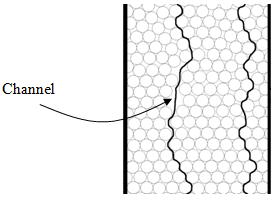

Representation of a packed chromatographic column with a channel. Reproduced from https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Supplemental_Modules_(Analytical_Chemistry)/Analytical_Sciences_Digital_Library/Courseware/Separation_Science/02_Text/03_Broadening_of_Chromatographic_Peaks/02_Eddy_Diffusion_(Multipath)_Broadening_in_Chromatography

**Key properties**
- **Independent of $u$:** the geometric spread of path lengths doesn’t disappear when you drive the flow faster or slower. Hence $A$ is the **flat** part in $H(u) = A + \tfrac{B}{u} + C\,u$.
- **Packing quality matters:** more **uniform packing** → fewer extreme paths → **smaller $A$**.
- **Particle size dependence:** for packed beds, $A$ scales roughly with **particle diameter** $d_p$,
  $$
  A \;\approx\; \lambda\, d_p,
  $$
  where $\lambda$ (≈ 1–2 in many texts) captures packing heterogeneity. In **reduced form** ($h = H/d_p$) this shows up as a constant contribution $a$.
- **Where $A$ vanishes:** in **open-tubular GC** (no packing, only a thin film), there are no alternate paths → $A \approx 0$.

**What increases $A$**
- Poor packing or **voids/channels**; **wall effects** at the tube boundary.
- Large or **nonuniform particle sizes**; damaged frits; vibration during operation.

**What decreases $A$**
- **Smaller $d_p$** (e.g., HPLC → UHPLC); **narrow particle size distribution**.
- Careful slurry packing; good frits; avoiding bed disturbances.
- **Core–shell** particles can help indirectly (more uniform flow paths in the bed).

**Rule of thumb for method design**
- You cannot tune $A$ by changing flow during a run; you **choose** $A$ through **hardware and column** decisions (particle size/quality, packing). Once the column is installed and equilibrated, $A$ is essentially fixed.

*Next:* we’ll see why **longitudinal diffusion** ($\tfrac{B}{u}$) **decreases** with increasing flow (molecules have less time to diffuse), and why **mass-transfer resistance** ($C\,u$) **increases** with flow (less time to equilibrate between phases).


With the link from $H$ to peak width in mind, the next question is: **how does $H$ change with flow?**

The van Deemter prediction $H(u)=A+\tfrac{B}{u}+C\,u$ is **U-shaped**, so there is a practical sweet spot where total broadening is minimal:

$$
u_{\text{opt}} \;=\; \sqrt{\frac{B}{C}}, 
\qquad 
H_{\min} \;=\; A \;+\; 2\sqrt{BC}.
$$

**Why this matters in practice**
- **Efficiency:** Plate number $N=L/H$ — smaller $H$ means more plates and **sharper peaks** for a given column length $L$.  
- **Resolution:** At fixed selectivity and retention, **lower $H$** generally **improves $R_s$**.  
- **Design levers:** **Particle size** and packing quality influence $A$ and $C$; **diffusion**, temperature, and solvent affect $B$. **Hardware limits** (pressure, extra-column effects) may shift the usable operating point away from $u_{\text{opt}}$.

**Scope & caveats**
- We use the classical **lumped-parameter** form for clarity. Advanced models split $C$ into mobile/stationary terms and use **reduced variables** $h=H/d_p$, $\nu = u\,d_p/D_m$ for cross-column comparisons; we introduce these later where helpful.  
- **Extra-column broadening** is not part of the van Deemter equation but is crucial in real instruments; we treat it separately.

### Van Deemter — interactive visualization

Use the sliders to explore how **$A$**, **$B/u$**, and **$C\,u$** shape the plate-height curve $H(u)=A+\frac{B}{u}+C\,u$.

- The **shaded background** shows where each term **dominates** (largest contributor to $H$ at that $u$).  
- Dashed lines show the three terms; the solid line is the **total** $H(u)$.  
- The vertical dotted line marks $u_{\mathrm{opt}}=\sqrt{B/C}$; the marker shows $H_{\min}=A+2\sqrt{BC}$.

*Units are pedagogical; the qualitative LC/GC trends remain the same.*

In [3]:
interact(
    van_deemter_plot,
    u_min=FloatSlider(description='x-Axis min', value=0.05, min=0.01, max=1.0, step=0.01, readout_format='.2f'),
    u_max=FloatSlider(description='x-Axis max', value=3.0, min=1.5, max=5.0, step=0.1, readout_format='.1f'),
    show_terms=Checkbox(description='Show individual terms', value=True),
)

interactive(children=(FloatSlider(value=5.0, description='A', max=15.0, min=-5.0), FloatSlider(value=1.0, desc…

<function module01.van_deemter_plot(A=5.0, B=1.0, C=5.0, u_min=0.05, u_max=3.0, show_terms=True)>

In [4]:
interact(
    van_deemter_particles_plot,
    u_min=FloatSlider(description='x-Axis min', value=0.05, min=0.01, max=1.0, step=0.01, readout_format='.2f'),
    u_max=FloatSlider(description='x-Axis max', value=3.0,  min=1.5,  max=5.0, step=0.1,  readout_format='.1f'),
    show_opt=Checkbox(description='Show optima', value=True),
)

interactive(children=(FloatSlider(value=5.0, description='A0', max=15.0, min=-5.0), FloatSlider(value=1.0, des…

<function module01.van_deemter_particles_plot(A0=5.0, B0=1.0, C0=5.0, u_min=0.05, u_max=3.0, show_opt=True)>